<a href="https://colab.research.google.com/github/microsoft/autogen/blob/main/notebook/agenteval_cq_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrating the `AgentEval` framework using the task of solving GAIA bechmark

This notebook aims to demonstrate how to `AgentEval` implemented through [AutoGen](https://github.com/microsoft/autogen) works, where we use a math problem-solving task as an example. 
`AgentEval` consists of two key components:

- `CriticAgent`: This is an LLM-based agent that generates a list criteria $(c_1, \dots, c_n)$ to help to evaluate a utility given task.

- `QuantifierAgent`: This agent quantifies the performance of any sample task based on the criteria designed by the `CriticAgent` in the following way: $(c_1=a_1, \dots, c_n=a_n)$

![AgentEval](../website/blog/2023-11-11-AgentEval/img/agenteval-CQ.png)

For more detailed explanations, please refer to the accompanying [blog post](https://https://microsoft.github.io/autogen/blog/2023/11/11/AgentEval)

## Requirements

AutoGen requires `Python>=3.8`. To run this notebook example, please install pyautogen, Docker, and OpenAI:


In [1]:
%pip install "pyautogen>=0.2.3"
%pip install scipy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Set your API Endpoint

* The [`config_list_openai_aoai`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_openai_aoai) function tries to create a list of configurations using Azure OpenAI endpoints and OpenAI endpoints. It assumes the api keys and api bases are stored in the corresponding environment variables or local txt files:
  - OpenAI API key: os.environ["OPENAI_API_KEY"] or `openai_api_key_file="key_openai.txt"`.
  - Azure OpenAI API key: os.environ["AZURE_OPENAI_API_KEY"] or `aoai_api_key_file="key_aoai.txt"`. Multiple keys can be stored, one per line.
  - Azure OpenAI API base: os.environ["AZURE_OPENAI_API_BASE"] or `aoai_api_base_file="base_aoai.txt"`. Multiple bases can be stored, one per line.
* The [`config_list_from_json`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_from_json) function loads a list of configurations from an environment variable or a json file. It first looks for an environment variable with a specified name. The value of the environment variable needs to be a valid json string. If that variable is not found, it looks for a json file with the same name. It filters the configs by filter_dict.

You can set the value of config_list in any way you prefer. Please refer to this [notebook](https://github.com/microsoft/autogen/blob/main/notebook/oai_openai_utils.ipynb) for full code examples of the different methods.


In [2]:
import autogen
import json


print(autogen.__version__)

#config_list = json.loads(secrect-string)

config_list = autogen.config_list_from_json(
    env_or_file="../OAI_CONFIG_LIST",
    file_location=".",
    filter_dict={
        "model": ["gpt-4"],
    },
)

print(config_list[0]["base_url"])



c:\Users\jukisele\AppData\Local\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


0.2.9
https://gcraoai8sw2.openai.azure.com/
40696eb0167747f4905356965bd123a7


# The Criteria
Now, we print the designed criteria. 

In [7]:
import json
import os

solution_based_c = []
number_json_error = 0

# Iterate through files in the directory
for file in os.listdir('../logs/solution-based/'):
    with open('../logs/solution-based/' + file, 'r') as f:
        # Read the file content
        file_content = f.read()
        
        # Replace single quotes with double quotes
        fixed_content = file_content.replace("'", '"')
        
        # Load JSON object from fixed content
        try:
            json_object = json.loads(fixed_content)
        except json.JSONDecodeError as e:
            number_json_error = number_json_error + 1
            print(f"Error decoding JSON in file {file}: {e}")
            continue
        
        # Extract keys and convert them to lowercase
        for key in json_object.keys():
            print("Criteria "+key)
            solution_based_c.append(key.lower())

# Print the keys
#print(number_json_error)            
print(solution_based_c)

Error decoding JSON in file gaia-30-0383a3ee-47a7-41a4-b493-519bdefe0488.json: Expecting ',' delimiter: line 32 column 36 (char 1475)
Error decoding JSON in file gaia-30-11af4e1a-5f45-467d-9aeb-46f4bb0bf034.json: Expecting ',' delimiter: line 24 column 36 (char 1153)
Error decoding JSON in file gaia-30-1f975693-876d-457b-a649-393859e79bf3.json: Expecting ',' delimiter: line 7 column 54 (char 283)
Criteria completeness
Criteria correctness
Criteria efficiency
Criteria reasoning_traceability
Criteria originality
Criteria response_time
Criteria Correctness_of_Analysis
Criteria Completeness_of_Reasoning
Criteria Logical_Consistency
Criteria Explanation_Clarity
Criteria Efficiency_of_Steps
Criteria Response_Timeliness
Error decoding JSON in file gaia-30-2d83110e-a098-4ebb-9987-066c06fa42d0.json: Expecting ',' delimiter: line 4 column 46 (char 71)
Error decoding JSON in file gaia-30-305ac316-eef6-4446-960a-92d80d542f82.json: Expecting property name enclosed in double quotes: line 6 column 13

In [12]:
#%pip install wordcloud
%pip install sentence-transformers

     -------------------------------------- 149.5/149.5 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 8.5/8.5 MB 27.3 MB/s eta 0:00:00
     ------------------------------------- 330.1/330.1 kB 20.0 MB/s eta 0:00:00
     ------------------------------------- 170.9/170.9 kB 10.7 MB/s eta 0:00:00
     -------------------------------------- 269.5/269.5 kB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.11.0
    Uninstalling fsspec-2022.11.0:
      Successfully uninstalled fsspec-2022.11.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.11.4
    Uninstalling tokenizers-0.11.4:
      Successfully uninstalled tokenizers-0.1

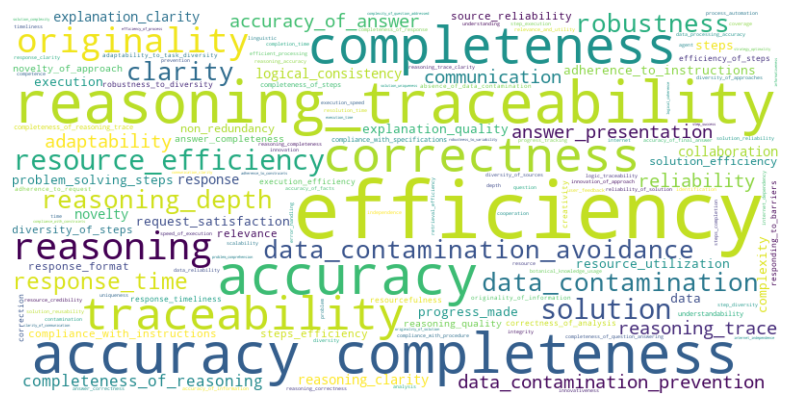

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your list of terms

# Convert the list of terms into a single string
text = " ".join(solution_based_c)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
from sentence_transformers import SentenceTransformer, util
import os 
model = SentenceTransformer('paraphrase-MiniLM-L12-v2')


def get_unique_with_sim(all_criteria_list_of_list,threshold):
    #criteria_path='/home/narabzad/agenteval/experiments/test/test_files/agenteval-in-out/task_based'
    all_criteria=[]
    for l in all_criteria_list_of_list:
        all_criteria+=l

    #Compute embedding for both lists
    embeddings1 = model.encode(all_criteria, convert_to_tensor=True)
    embeddings2 = model.encode(all_criteria, convert_to_tensor=True)

    #Compute cosine-similarities
    cosine_scores = util.cos_sim(embeddings1, embeddings2)

    #Output the pairs with their score

    all_c_copy = all_criteria.copy()
    for i in range(len(all_criteria)):
        for j in range(i+1,len(all_criteria)):
            if cosine_scores[i][j] > threshold:
                if all_criteria[j] in all_c_copy:
                    all_c_copy.remove(all_criteria[j])
        print("{} \t\t {} \t\t Score: {:.4f}".format(all_criteria[i], all_criteria[j], cosine_scores[i][j]))
    
    tmp=[]
    for l in all_c_copy:
        tmp+=l.split(' : ')[0]
    return tmp

cleaned_criteria = get_unique_with_sim(solution_based_c, 0.75)

 


: 

In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np

def find_synonymous_in_list(word_list, threshold=0.75):
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Load a pre-trained SentenceTransformer model
    embeddings = model.encode(word_list, convert_to_tensor=True)  # Compute embeddings for the word list

    synonymous_pairs = []
    for i, word in enumerate(word_list):
        for j, other_word in enumerate(word_list):
            if i != j:
                cosine_sim = np.dot(embeddings[i], embeddings[j]) / (np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j]))
                if cosine_sim > threshold:
                    synonymous_pairs.append((word, other_word))
    return synonymous_pairs

# Example usage:
word_list = ["happy", "joyful", "sad", "unhappy", "merry"]
synonymous_pairs = find_synonymous_in_list(word_list)
print(synonymous_pairs)


: 

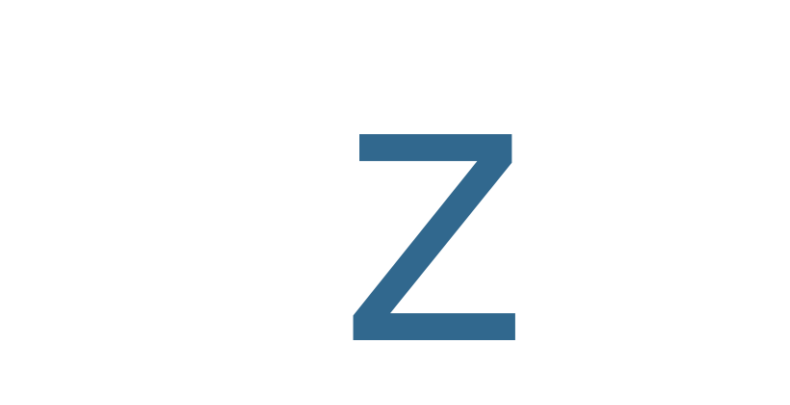

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your list of terms

# Convert the list of terms into a single string
text = " ".join(cleaned_criteria)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()